# **Importing all necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
import re
import nltk

# **Defining all necessary functions**

In [ ]:
def clean_texts_1(texts,symbols_to_remove='123456790!@#$%^&*()`[]{};:?/.><,-_=+*~\n\t'):
    texts=[text.lower().strip().rstrip() for text in texts]
    for s in symbols_to_remove:
        texts=[text.replace(s,'') for text in texts]
    return texts

In [ ]:
def clean_texts_2(texts,symbols_to_remove='123456790!@#$%^&*()`[]{};:?/.><,-_=+*~\n\t'):
    texts=texts.apply(lambda x: x.lower())
    texts=texts.apply(lambda x: x.strip())
    texts=texts.apply(lambda x: x.rstrip())
    texts=texts.apply(lambda x: nltk.word_tokenize(x))
    texts=texts.apply(lambda x: [y.replace("n't",'not') for y in x])
    for s in symbols_to_remove:
        texts=texts.apply(lambda x:[w.replace(s,'') for w in x])
    texts=texts.apply(lambda x:[w for w in x if w in words])
    texts=texts.apply(lambda x:[w for w in x if w!=''])
    return texts

# **Processing text**

In [ ]:
eng=['Who are you talking to right now?',
     'Who is it you think you see? Do you know how much I make a year?',
     'I mean, even if I told you, you wouldn\'t believe it.',
     'Do you know what would happen if I suddenly decided to stop going into work?',
     'I am not in danger - I am the danger.']
print(eng)
ukr=['Білочка – це невелика тваринка, яку можна зустріти в лісах та парках.',
     'Її руденьку шубку та пухнастий хвіст добре видно серед дерев і взимку, і влітку.',
     'Вона прудка та швидка, легко перестрибує з дерева на дерево, керуючи хвостиком, мов кермом.',
     'Мордочка маленька, як і сама тваринка, і витягнута.']
print(ukr)

['Who are you talking to right now?', 'Who is it you think you see? Do you know how much I make a year?', "I mean, even if I told you, you wouldn't believe it.", 'Do you know what would happen if I suddenly decided to stop going into work?', 'I am not in danger - I am the danger.']
['Білочка – це невелика тваринка, яку можна зустріти в лісах та парках.', 'Її руденьку шубку та пухнастий хвіст добре видно серед дерев і взимку, і влітку.', 'Вона прудка та швидка, легко перестрибує з дерева на дерево, керуючи хвостиком, мов кермом.', 'Мордочка маленька, як і сама тваринка, і витягнута.']


## **Cleaning text**

In [ ]:
eng=clean_texts_1(eng)
ukr=clean_texts_1(ukr)
print(eng,'\n')
print(ukr)

['who are you talking to right now', 'who is it you think you see do you know how much i make a year', "i mean even if i told you you wouldn't believe it", 'do you know what would happen if i suddenly decided to stop going into work', 'i am not in danger  i am the danger'] 

['білочка – це невелика тваринка яку можна зустріти в лісах та парках', 'її руденьку шубку та пухнастий хвіст добре видно серед дерев і взимку і влітку', 'вона прудка та швидка легко перестрибує з дерева на дерево керуючи хвостиком мов кермом', 'мордочка маленька як і сама тваринка і витягнута']


## **Vectorizing texts**

### **CountVecorizer**

#### **English**

In [ ]:
count=CountVectorizer(ngram_range=(1,1),stop_words=None,max_df=1.0)
vectorized=count.fit_transform(eng)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'you': 36, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
  1]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
  3]
 [0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
  2]
 [0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0
  1]
 [2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0]]


In [ ]:
count=CountVectorizer(ngram_range=(1,1),stop_words=None,max_df=0.5)
vectorized=count.fit_transform(eng)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0]
 [2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [ ]:
count=CountVectorizer(ngram_range=(1,1),stop_words='english',max_df=1.0)
vectorized=count.fit_transform(eng)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'talking': 11, 'right': 8, 'think': 12, 'know': 5, 'make': 6, 'year': 16, 'mean': 7, 'told': 13, 'wouldn': 15, 'believe': 0, 'happen': 4, 'suddenly': 10, 'decided': 2, 'stop': 9, 'going': 3, 'work': 14, 'danger': 1}
[[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0]
 [0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
count=CountVectorizer(ngram_range=(2,2),stop_words=None,max_df=1.0)
vectorized=count.fit_transform(eng)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'who are': 34, 'are you': 2, 'you talking': 40, 'talking to': 27, 'to right': 30, 'right now': 23, 'who is': 35, 'is it': 15, 'it you': 16, 'you think': 41, 'think you': 29, 'you see': 39, 'see do': 24, 'do you': 6, 'you know': 38, 'know how': 17, 'how much': 10, 'much make': 21, 'make year': 19, 'mean even': 20, 'even if': 7, 'if told': 12, 'told you': 32, 'you you': 43, 'you wouldn': 42, 'wouldn believe': 37, 'believe it': 3, 'know what': 18, 'what would': 33, 'would happen': 36, 'happen if': 9, 'if suddenly': 11, 'suddenly decided': 26, 'decided to': 5, 'to stop': 31, 'stop going': 25, 'going into': 8, 'into work': 14, 'am not': 0, 'not in': 22, 'in danger': 13, 'danger am': 4, 'am the': 1, 'the danger': 28}
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
  0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
  0 0 1 1 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 1 1]

#### **Ukrainian**

In [ ]:
count=CountVectorizer(ngram_range=(1,1),stop_words=None,max_df=1.0)
vectorized=count.fit_transform(ukr)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 32, 'невелика': 20, 'тваринка': 29, 'яку': 36, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'та': 28, 'парках': 21, 'її': 37, 'руденьку': 25, 'шубку': 34, 'пухнастий': 24, 'хвіст': 31, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 33, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 30, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 35, 'сама': 26, 'витягнута': 3}
[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
  1 0]
 [0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0
  0 1]
 [0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0
  0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
  0 0]]


In [ ]:
count=CountVectorizer(ngram_range=(1,1),stop_words=None,max_df=0.25)
vectorized=count.fit_transform(ukr)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 30, 'невелика': 20, 'яку': 34, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'парках': 21, 'її': 35, 'руденьку': 25, 'шубку': 32, 'пухнастий': 24, 'хвіст': 29, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 31, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 28, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 33, 'сама': 26, 'витягнута': 3}
[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]]


In [ ]:
count=CountVectorizer(ngram_range=(2,2),stop_words=None,max_df=1.0)
vectorized=count.fit_transform(ukr)
vectorized=vectorized.toarray()
print(count.vocabulary_)
print(vectorized)

{'білочка це': 0, 'це невелика': 31, 'невелика тваринка': 17, 'тваринка яку': 28, 'яку можна': 35, 'можна зустріти': 14, 'зустріти лісах': 8, 'лісах та': 11, 'та парках': 24, 'її руденьку': 36, 'руденьку шубку': 21, 'шубку та': 33, 'та пухнастий': 25, 'пухнастий хвіст': 20, 'хвіст добре': 30, 'добре видно': 7, 'видно серед': 2, 'серед дерев': 23, 'дерев взимку': 4, 'взимку влітку': 1, 'вона прудка': 3, 'прудка та': 19, 'та швидка': 26, 'швидка легко': 32, 'легко перестрибує': 10, 'перестрибує дерева': 18, 'дерева на': 5, 'на дерево': 16, 'дерево керуючи': 6, 'керуючи хвостиком': 9, 'хвостиком мов': 29, 'мов кермом': 13, 'мордочка маленька': 15, 'маленька як': 12, 'як сама': 34, 'сама тваринка': 22, 'тваринка витягнута': 27}
[[1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
  0]
 [0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
  1]
 [0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0

### **TfIdf**

#### **English**

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=True,smooth_idf=True)
vectorized=tfidf.fit_transform(eng)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'you': 36, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0.         0.42185336 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.42185336 0.42185336 0.         0.
  0.         0.42185336 0.         0.         0.34034864 0.
  0.         0.34034864 0.         0.         0.         0.
  0.23766483]
 [0.         0.         0.         0.         0.         0.22855929
  0.         0.         0.         0.28329335 0.         0.
  0.         0.28329335 0.22855929 0.22855929 0.28329335 0.
  

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=True,smooth_idf=False)
vectorized=tfidf.fit_transform(eng)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'you': 36, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0.         0.43444144 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.43444144 0.43444144 0.         0.
  0.         0.43444144 0.         0.         0.3190404  0.
  0.         0.3190404  0.         0.         0.         0.
  0.20363935]
 [0.         0.         0.         0.         0.         0.22007792
  0.         0.         0.         0.29968296 0.         0.
  0.         0.29968296 0.22007792 0.22007792 0.29968296 0.
  

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=False,smooth_idf=True)
vectorized=tfidf.fit_transform(eng)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'you': 36, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0.         0.37796447 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.37796447 0.37796447 0.         0.
  0.         0.37796447 0.         0.         0.37796447 0.
  0.         0.37796447 0.         0.         0.         0.
  0.37796447]
 [0.         0.         0.         0.         0.         0.2236068
  0.         0.         0.         0.2236068  0.         0.
  0.         0.2236068  0.2236068  0.2236068  0.2236068  0.
  0

In [ ]:
tfidf=TfidfVectorizer(norm='l1',use_idf=True,smooth_idf=True)
vectorized=tfidf.fit_transform(eng)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'who': 31, 'are': 1, 'you': 36, 'talking': 25, 'to': 28, 'right': 21, 'now': 20, 'is': 13, 'it': 14, 'think': 27, 'see': 22, 'do': 5, 'know': 15, 'how': 9, 'much': 18, 'make': 16, 'year': 35, 'mean': 17, 'even': 6, 'if': 10, 'told': 29, 'wouldn': 34, 'believe': 2, 'what': 30, 'would': 33, 'happen': 8, 'suddenly': 24, 'decided': 4, 'stop': 23, 'going': 7, 'into': 12, 'work': 32, 'am': 0, 'not': 19, 'in': 11, 'danger': 3, 'the': 26}
[[0.         0.16189167 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.16189167 0.16189167 0.         0.
  0.         0.16189167 0.         0.         0.13061318 0.
  0.         0.13061318 0.         0.         0.         0.
  0.09120694]
 [0.         0.         0.         0.         0.         0.06769924
  0.         0.         0.         0.08391147 0.         0.
  0.         0.08391147 0.06769924 0.06769924 0.08391147 0.
  

#### **Ukrainian**

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=True,smooth_idf=True)
vectorized=tfidf.fit_transform(ukr)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 32, 'невелика': 20, 'тваринка': 29, 'яку': 36, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'та': 28, 'парках': 21, 'її': 37, 'руденьку': 25, 'шубку': 34, 'пухнастий': 24, 'хвіст': 31, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 33, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 30, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 35, 'сама': 26, 'витягнута': 3}
[[0.33279753 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.33279753 0.
  0.         0.         0.33279753 0.         0.         0.33279753
  0.         0.         0.33279753 0.33279753 0.         0.
  0.         0.         0.         0.         0.21242036 0.2623814
  0.         0.         0.33279753 0.         0.         0.
  0.33279753 0.        ]
 [0.         0.29607822 0.29607822 0.         0.29607822 0.
  0.29607822 0.         0.  

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=True,smooth_idf=False)
vectorized=tfidf.fit_transform(ukr)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 32, 'невелика': 20, 'тваринка': 29, 'яку': 36, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'та': 28, 'парках': 21, 'її': 37, 'руденьку': 25, 'шубку': 34, 'пухнастий': 24, 'хвіст': 31, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 33, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 30, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 35, 'сама': 26, 'витягнута': 3}
[[0.33720307 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.33720307 0.
  0.         0.         0.33720307 0.         0.         0.33720307
  0.         0.         0.33720307 0.33720307 0.         0.
  0.         0.         0.         0.         0.18196009 0.23925565
  0.         0.         0.33720307 0.         0.         0.
  0.33720307 0.        ]
 [0.         0.29759816 0.29759816 0.         0.29759816 0.
  0.29759816 0.         0. 

In [ ]:
tfidf=TfidfVectorizer(norm='l2',use_idf=False,smooth_idf=True)
vectorized=tfidf.fit_transform(ukr)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 32, 'невелика': 20, 'тваринка': 29, 'яку': 36, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'та': 28, 'парках': 21, 'її': 37, 'руденьку': 25, 'шубку': 34, 'пухнастий': 24, 'хвіст': 31, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 33, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 30, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 35, 'сама': 26, 'витягнута': 3}
[[0.31622777 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.31622777 0.
  0.         0.         0.31622777 0.         0.         0.31622777
  0.         0.         0.31622777 0.31622777 0.         0.
  0.         0.         0.         0.         0.31622777 0.31622777
  0.         0.         0.31622777 0.         0.         0.
  0.31622777 0.        ]
 [0.         0.28867513 0.28867513 0.         0.28867513 0.
  0.28867513 0.         0. 

In [ ]:
tfidf=TfidfVectorizer(norm='l1',use_idf=True,smooth_idf=True)
vectorized=tfidf.fit_transform(ukr)
vectorized=vectorized.toarray()
print(tfidf.vocabulary_)
print(vectorized)

{'білочка': 0, 'це': 32, 'невелика': 20, 'тваринка': 29, 'яку': 36, 'можна': 17, 'зустріти': 10, 'лісах': 14, 'та': 28, 'парках': 21, 'її': 37, 'руденьку': 25, 'шубку': 34, 'пухнастий': 24, 'хвіст': 31, 'добре': 9, 'видно': 2, 'серед': 27, 'дерев': 6, 'взимку': 1, 'влітку': 4, 'вона': 5, 'прудка': 23, 'швидка': 33, 'легко': 13, 'перестрибує': 22, 'дерева': 7, 'на': 19, 'дерево': 8, 'керуючи': 12, 'хвостиком': 30, 'мов': 16, 'кермом': 11, 'мордочка': 18, 'маленька': 15, 'як': 35, 'сама': 26, 'витягнута': 3}
[[0.10608168 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.10608168 0.
  0.         0.         0.10608168 0.         0.         0.10608168
  0.         0.         0.10608168 0.10608168 0.         0.
  0.         0.         0.         0.         0.06771056 0.08363601
  0.         0.         0.10608168 0.         0.         0.
  0.10608168 0.        ]
 [0.         0.0859233  0.0859233  0.         0.0859233  0.
  0.0859233  0.         0. 

## **Tokenization**

### **Split on 'Space'**

In [ ]:
eng=[text.split(' ') for text in eng]
print(eng)
ukr=[text.split(' ') for text in ukr]
print(ukr)

[['who', 'are', 'you', 'talking', 'to', 'right', 'now'], ['who', 'is', 'it', 'you', 'think', 'you', 'see', 'do', 'you', 'know', 'how', 'much', 'i', 'make', 'a', 'year'], ['i', 'mean', 'even', 'if', 'i', 'told', 'you', 'you', "wouldn't", 'believe', 'it'], ['do', 'you', 'know', 'what', 'would', 'happen', 'if', 'i', 'suddenly', 'decided', 'to', 'stop', 'going', 'into', 'work'], ['i', 'am', 'not', 'in', 'danger', '', 'i', 'am', 'the', 'danger']]
[['білочка', '–', 'це', 'невелика', 'тваринка', 'яку', 'можна', 'зустріти', 'в', 'лісах', 'та', 'парках'], ['її', 'руденьку', 'шубку', 'та', 'пухнастий', 'хвіст', 'добре', 'видно', 'серед', 'дерев', 'і', 'взимку', 'і', 'влітку'], ['вона', 'прудка', 'та', 'швидка', 'легко', 'перестрибує', 'з', 'дерева', 'на', 'дерево', 'керуючи', 'хвостиком', 'мов', 'кермом'], ['мордочка', 'маленька', 'як', 'і', 'сама', 'тваринка', 'і', 'витягнута']]


### **Porter stemmer**

In [ ]:
porter=nltk.PorterStemmer()
print([[porter.stem(w) for w in text] for text in eng])

[['who', 'are', 'you', 'talk', 'to', 'right', 'now'], ['who', 'is', 'it', 'you', 'think', 'you', 'see', 'do', 'you', 'know', 'how', 'much', 'i', 'make', 'a', 'year'], ['i', 'mean', 'even', 'if', 'i', 'told', 'you', 'you', "wouldn't", 'believ', 'it'], ['do', 'you', 'know', 'what', 'would', 'happen', 'if', 'i', 'suddenli', 'decid', 'to', 'stop', 'go', 'into', 'work'], ['i', 'am', 'not', 'in', 'danger', '', 'i', 'am', 'the', 'danger']]


### **Snowball stemmer**

In [ ]:
snowball=nltk.SnowballStemmer(language='english')
print([[snowball.stem(w) for w in text] for text in eng])

[['who', 'are', 'you', 'talk', 'to', 'right', 'now'], ['who', 'is', 'it', 'you', 'think', 'you', 'see', 'do', 'you', 'know', 'how', 'much', 'i', 'make', 'a', 'year'], ['i', 'mean', 'even', 'if', 'i', 'told', 'you', 'you', "wouldn't", 'believ', 'it'], ['do', 'you', 'know', 'what', 'would', 'happen', 'if', 'i', 'sudden', 'decid', 'to', 'stop', 'go', 'into', 'work'], ['i', 'am', 'not', 'in', 'danger', '', 'i', 'am', 'the', 'danger']]


## **Stop words**

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')
print([[w for w in text if w not in stopwords] for text in eng])

[['talking', 'right'], ['think', 'see', 'know', 'much', 'make', 'year'], ['mean', 'even', 'told', 'believe'], ['know', 'would', 'happen', 'suddenly', 'decided', 'stop', 'going', 'work'], ['danger', '', 'danger']]


# **Sentiment analysis**

# **For this task was chosen dataset with depressive and non-depressive tweets from India: https://www.kaggle.com/datasets/mexwell/depressivenon-depressive-tweets-data**

In [ ]:
words=set(nltk.corpus.words.words('en'))

In [ ]:
df=pd.read_csv('/kaggle/input/depressivenon-depressive-tweets-data/clean_tweet_Dec19ToDec20.csv')
display(df)

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1
...,...,...,...
134343,134343,happydiwali to india from dgisi and dgispr you...,1
134344,134344,india has been involved in many countries with...,1
134345,134345,does anybody know website which ships pre orde...,0
134346,134346,what hinted few weeks back in an interview wit...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134348 entries, 0 to 134347
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134348 non-null  int64 
 1   text        134330 non-null  object
 2   sentiment   134348 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [ ]:
df=df.drop([0],axis=0)
df=df.drop(['Unnamed: 0'],axis=1)
df=df[df['text'].notna()]
df=df.reset_index().drop(['index'],axis=1)
display(df)

,text,sentiment
0,rising cases of covid does not alarm me rising...,1
1,please vote for chicagoindiaresolution marking...,0
2,wishing all of you eidaladha hazrat ibrahim as...,1
3,daily coronavirus cases in india top for first...,1
4,sitting here india style watching the raindrop...,0
...,...,...
134324,happydiwali to india from dgisi and dgispr you...,1
134325,india has been involved in many countries with...,1
134326,does anybody know website which ships pre orde...,0
134327,what hinted few weeks back in an interview wit...,0


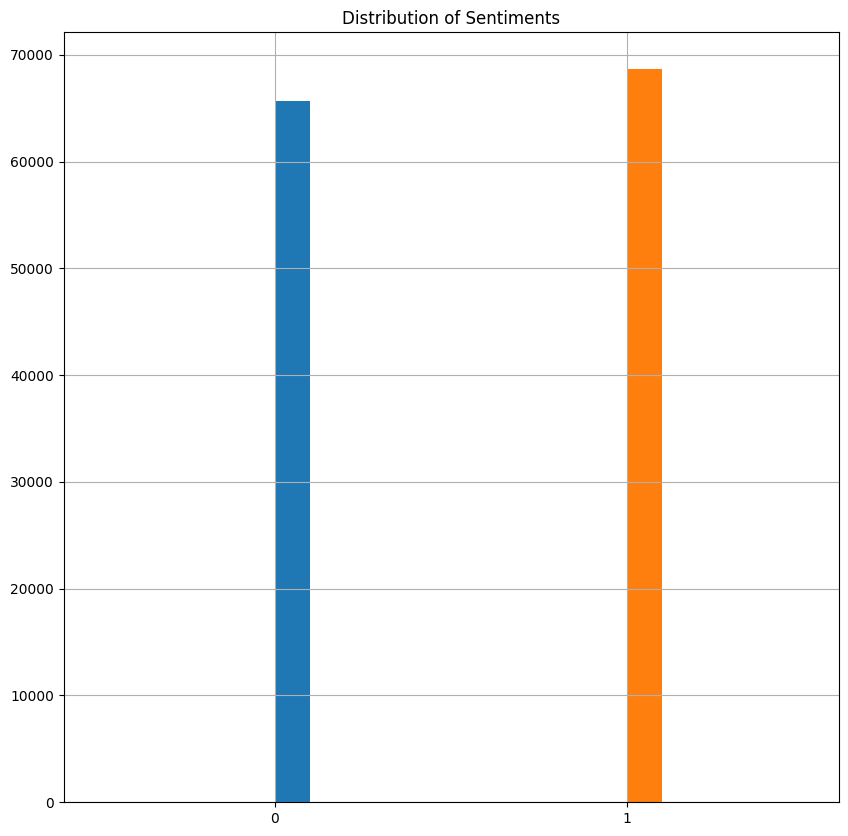

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Distribution of Sentiments')
ax.hist(df[df['sentiment']==0]['sentiment'])
ax.hist(df[df['sentiment']==1]['sentiment'])
ax.grid()
plt.xticks([0,1])
plt.show()

In [ ]:
df['text']=clean_texts_2(df['text'])
df=df.where(df['text'].str.len()>0).dropna().reset_index().drop(['index'],axis=1)
display(df)

,text,sentiment
0,"[rising, of, covid, does, not, alarm, me, risi...",1.0
1,"[please, vote, for, marking, independence, of,...",0.0
2,"[wishing, all, of, you, as, sab, ko, in, most,...",1.0
3,"[daily, in, top, for, first, time, covid]",1.0
4,"[sitting, here, style, watching, the, hit, thi...",0.0
...,...,...
133319,"[to, from, and, your, real, face, been, expose...",1.0
133320,"[been, involved, in, many, with, there, terror...",1.0
133321,"[does, anybody, know, which, order, season, to]",0.0
133322,"[what, few, back, in, an, interview, with, tod...",0.0


In [ ]:
porter=nltk.PorterStemmer()
df['text']=df['text'].apply(lambda x:[porter.stem(y) for y in x])
df['text']=df['text'].apply(lambda x:' '.join(x))
display(df)

,text,sentiment
0,rise of covid doe not alarm me rise death rate...,1.0
1,pleas vote for mark independ of democraci huma...,0.0
2,wish all of you as sab ko in most of,1.0
3,daili in top for first time covid,1.0
4,sit here style watch the hit thi big ass pond ...,0.0
...,...,...
133319,to from and your real face been expos today,1.0
133320,been involv in mani with there terror grow but...,1.0
133321,doe anybodi know which order season to,0.0
133322,what few back in an interview with today and w...,0.0


In [ ]:
y=list(df['sentiment'].astype(int).values)
print(y[:10])
texts=list(df['text'].values)
display(texts[:10])

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


['rise of covid doe not alarm me rise death rate doe more test capac more are and and mild are is in scari place go check out their',
 'pleas vote for mark independ of democraci human secular',
 'wish all of you as sab ko in most of',
 'daili in top for first time covid',
 'sit here style watch the hit thi big ass pond listen to ami winehous understand what wa talk about',
 'who out there that if china and had the same natur avail to them as',
 'veri happi with the new educ polici implement in educ is the basi of ani countri progress kudo nep',
 'develop partnership doe not come with',
 'prime minist how the new educ polici will succeed thi is possibl onli when the basic contractu teacher is mental healthi that is whi pay attent to their safe futur and fair salari thank you',
 'look forward to the implement of the new educ polici that to build strong and resili blend learn is the futur to']

In [ ]:
names=['depressive','non-depressive']

In [ ]:
texts,tests_,y,y_=train_test_split(texts,y,train_size=0.5,random_state=1)
print(f'Number of samples:{len(texts)}')

Number of samples:66662


In [ ]:
texts_train,texts_test,y_train,y_test=train_test_split(texts,y,train_size=0.75,random_state=1)
texts_val,texts_test,y_val,y_test=train_test_split(texts_test,y_test,test_size=0.5,random_state=1)
print(len(texts_train))
print(len(texts_test))
print(len(texts_val))

49996
8333
8333


In [ ]:
ngram_range=[(1,1),(2,2)]
max_df=[1.0,0.8]
min_df=[1,2]
stop_words=['english',None]
grid_params={'countvectorizer__ngram_range':ngram_range,'countvectorizer__max_df':max_df,'countvectorizer__min_df':min_df,'countvectorizer__stop_words':stop_words}
grid=GridSearchCV(param_grid=grid_params,estimator=make_pipeline(CountVectorizer(),LogisticRegression(max_iter=10,tol=1e-2)),scoring='accuracy')
grid.fit(texts_val,y_val)
print(f'Best Score:{grid.best_score_}')
print(f'Best Parameters:{grid.best_params_}')

Best Score:0.8352333374861644
Best Parameters:{'countvectorizer__max_df': 1.0, 'countvectorizer__min_df': 2, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': None}


Number of features:9079
Train accuracy:0.8656892551404113
Test accuracy:0.8576743069722789


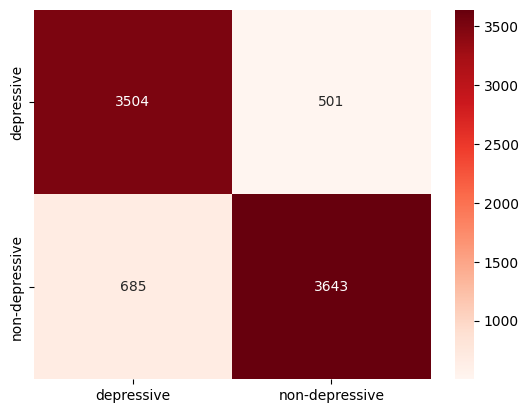

In [ ]:
count=CountVectorizer(max_df=1.0,min_df=2,ngram_range=(1,1),stop_words=None)
X_train=count.fit_transform(texts_train).toarray()
X_test=count.transform(texts_test).toarray()
print(f'Number of features:{X_train.shape[1]}')
model=LogisticRegression(max_iter=10,tol=1e-2)
model.fit(X_train,y_train)
print(f'Train accuracy:{accuracy_score(y_train,model.predict(X_train))}')
print(f'Test accuracy:{accuracy_score(y_test,model.predict(X_test))}')
cm=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d',xticklabels=names,yticklabels=names)
plt.show()

In [ ]:
ngram_range=[(1,1),(2,2)]
max_df=[1.0,0.8]
min_df=[1,2]
stop_words=['english',None]
grid_params={'tfidfvectorizer__ngram_range':ngram_range,'tfidfvectorizer__max_df':max_df,'tfidfvectorizer__min_df':min_df,'tfidfvectorizer__stop_words':stop_words}
grid=GridSearchCV(estimator=make_pipeline(TfidfVectorizer(),LogisticRegression(max_iter=10,tol=1e-2)),param_grid=grid_params,scoring='accuracy')
grid.fit(texts_val,y_val)
print(f'Best Score:{grid.best_score_}')
print(f'Best Parameters:{grid.best_params_}')

Best Score:0.8425534580958958
Best Parameters:{'tfidfvectorizer__max_df': 1.0, 'tfidfvectorizer__min_df': 1, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': None}


Number of features:13001
Train accuracy:0.8995719657572606
Test accuracy:0.8832353294131765


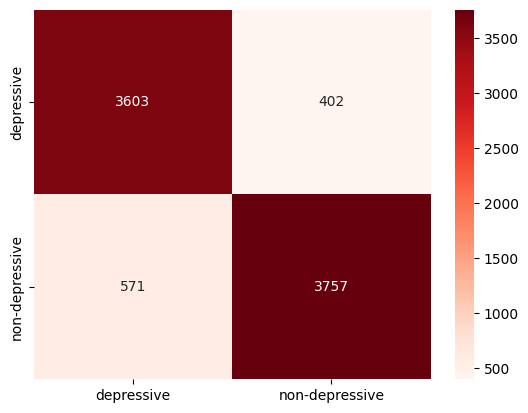

In [ ]:
tfidf=TfidfVectorizer(max_df=1.0,min_df=1,ngram_range=(1,1),stop_words=None)
X_train=tfidf.fit_transform(texts_train).toarray()
X_test=tfidf.transform(texts_test).toarray()
print(f'Number of features:{X_train.shape[1]}')
model=LogisticRegression(max_iter=10,tol=1e-2)
model.fit(X_train,y_train)
print(f'Train accuracy:{accuracy_score(y_train,model.predict(X_train))}')
print(f'Test accuracy:{accuracy_score(y_test,model.predict(X_test))}')
cm=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d',xticklabels=names,yticklabels=names)
plt.show()

In [ ]:
ngram_range=[(1,1),(2,2)]
stop_words=['english',None]
n_features=[2**i for i in range(12,15)]
grid_params={'hashingvectorizer__ngram_range':ngram_range,'hashingvectorizer__n_features':n_features,'hashingvectorizer__stop_words':stop_words}
grid=GridSearchCV(estimator=make_pipeline(HashingVectorizer(),LogisticRegression(max_iter=10)),param_grid=grid_params,scoring='accuracy')
grid.fit(texts_val,y_val)
print(f'Best Score:{grid.best_score_}')
print(f'Best Parameters:{grid.best_params_}')

Best Score:0.8231122322954377
Best Parameters:{'hashingvectorizer__n_features': 16384, 'hashingvectorizer__ngram_range': (1, 1), 'hashingvectorizer__stop_words': None}


Number of features:16384
Train accuracy:0.8637490999279942
Test accuracy:0.8553942157686307


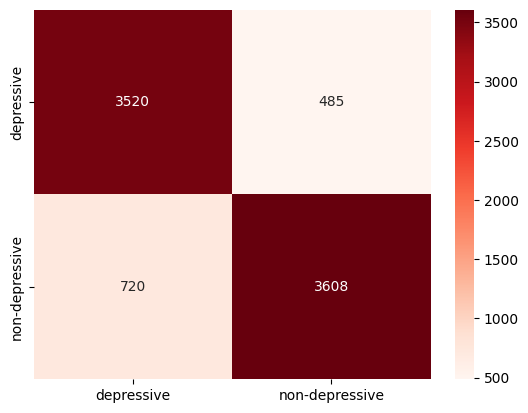

In [ ]:
hashing=HashingVectorizer(n_features=16384,ngram_range=(1,1),stop_words=None)
X_train=hashing.fit_transform(texts_train).toarray()
X_test=hashing.transform(texts_test).toarray()
print(f'Number of features:{X_train.shape[1]}')
model=LogisticRegression(max_iter=10,tol=1e-2)
model.fit(X_train,y_train)
print(f'Train accuracy:{accuracy_score(y_train,model.predict(X_train))}')
print(f'Test accuracy:{accuracy_score(y_test,model.predict(X_test))}')
cm=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d',xticklabels=names,yticklabels=names)
plt.show()

# **Topic Modeling**

## **2 Topics**

### **Batch**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=2,random_state=1,learning_method='batch')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
wa like peopl hi nice money need job whi new
Topic 2:
love sad day broken time health feel peopl anger like


* Topic 1: More-less positive tweets.
* Topic 2: Generally depressed/negative tweets.


### **Online**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=2,random_state=1,learning_method='online')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
like wa sad love broken peopl feel know mental time
Topic 2:
money diseas health new peopl death day world covid educ


* Topic 1: Tweets about mental state.
* Topic 2: Tweets about real-world problems.

## **3 Topics**

### **Batch**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=3,random_state=1,learning_method='batch')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
wa like hi nice job aw damag realli think veri
Topic 2:
love sad day broken time feel like anger na alon
Topic 3:
peopl health diseas death blame money whi mental pleas want


* Topic 1: ???
* Topic 2: Tweets about mental state.
* Topic 3: Tweets about disese(diseases).

### **Online**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=3,random_state=1,learning_method='online')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
like peopl wa mental blame want nice alon know think
Topic 2:
love sad wa broken day anger good feel time happi
Topic 3:
diseas health new peopl death world covid educ thank onli


* Topic 1: ???
* Topic 2: Tweets about mental state.
* Topic 3: Tweets about COVID-19.

## **5 Topics**

### **Batch**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=5,random_state=1,learning_method='batch')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
wa like aw damag hi did blame peopl think horribl
Topic 2:
sad day broken time anger feel alon heart life difficult
Topic 3:
peopl pleas diseas help whi need want death ani blame
Topic 4:
health mental money na new job educ peopl diseas alcohol
Topic 5:
love like nice hi person good peopl funni veri don


* Topic 1: ???
* Topic 2: Generally depressed tweets.
* Topic 3: Tweets about disease(diseases).
* Topic 4: Tweets about real-world problems.
* Topic 5: Positive/Non-depressed tweets.

### **Online**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=5,random_state=1,learning_method='online')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
money make job stop need want work talk whi peopl
Topic 2:
wa hi time said countri onli famili start make year
Topic 3:
diseas day health world covid death thank today hope great
Topic 4:
mental time alon wa blame like health got aw peopl
Topic 5:
love sad like feel anger peopl nice broken person realli


* Topic 1: Tweets about job.
* Topic 2: ???
* Topic 3: Tweets about COVID-19.
* Topic 4: Generally depressed tweets (1)?
* Topic 5: Generally depressed tweets (2)?

## **10 Topics**

### **Batch**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=10,random_state=1,learning_method='batch')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
wa hi brilliant game team girl watch like year damag
Topic 2:
day today happi funni time good hope love product life
Topic 3:
pleas thank want kind amaz whi help ani peopl god
Topic 4:
money na got gon like job wan broken make time
Topic 5:
love like feel nice good look super pride perfect kind
Topic 6:
diseas covid health death job countri china peopl vaccin govern
Topic 7:
aw peopl wa horribl realli becaus black whi polic like
Topic 8:
nice new educ veri hi school person uniqu pay understand
Topic 9:
sad broken anger wa feel like death heart blame depress
Topic 10:
peopl mental health difficult alcohol blame anxieti damag alon like


* Topic  1: Tweets about sport.
* Topic  2: Generally positive tweets (1)?
* Topic  3: Tweets about gratitude/pleading.
* Topic  4: Tweets about job.
* Topic  5: Generally positive tweets (2)?
* Topic  6: Tweets about COVID-19.
* Topic  7: Tweets about crime.
* Topic  8: Tweets about education(educational place).
* Topic  9: Generally depressed tweets (1)?
* Topic 10: Generally depressed tweets (2)?

### **Online**

In [ ]:
count=CountVectorizer(max_df=0.1,max_features=5000,stop_words='english')
X=count.fit_transform(texts)
X=X.toarray()
LDA=LatentDirichletAllocation(n_components=10,random_state=1,learning_method='online')
X_topics=LDA.fit_transform(X)
n_top_words=10
feature_names=count.get_feature_names_out()
for topic_idx,topic in enumerate(LDA.components_):
    print("Topic %d:"%(topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words-1:-1]]))

Topic 1:
money educ thank need talk great support liter govern fight
Topic 2:
love countri turn lost save case sorri ye stop wrong
Topic 3:
work today someth man actual hard right day respons diseas
Topic 4:
got time amaz watch hope use alcohol everi anyth money
Topic 5:
like good look na gon perfect everyon doe morn mind
Topic 6:
new job real pay black happi justic account birthday class
Topic 7:
wa death hi did covid year damag caus funni said
Topic 8:
nice day veri person super hi night product understand uniqu
Topic 9:
sad like peopl feel broken anger realli know becaus think
Topic 10:
health mental alon let peopl whi blame pleas want thing


* Topic  1: ???
* Topic  2: ???
* Topic  3: ???
* Topic  4: ???
* Topic  5: Generally positive tweets (1)?
* Topic  6: ???
* Topic  7: Tweets about COVID-19.
* Topic  8: Generally positive tweets (2)?
* Topic  9: Generally depressed tweets (1)?
* Topic 10: Generally depressed tweets (2)?